# [!] Notebook Description

Sinubi's Journey - DL - Classification

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1-4FxcS3A8efPTZRRIx7pCAvq1WQA7pL1?usp=sharing)

Oleh : Sinubi

September 2023 (230911)

# [A] Problem Definition and Scoping

Di sini kita akan memprediksi kelulusan siswa berdasarkan waktu belajar siswa, jenis kelamin, dan akses internet yang dimiliki siswa

# [B] Data Gathering and Preparation

In [ ]:
# Import Packages/Libraries yang diperlukan
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Download Dataset
gdown.download_folder("https://drive.google.com/drive/folders/1d0O3AuXl4z8VSj75v6WWuaxtUWXnmSYB?usp=sharing")

Retrieving folder list


Processing file 1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G Dataset SJ 01.xlsx
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G
To: /content/Sinubi's Journey/Dataset SJ 01.xlsx
100%|██████████| 12.2k/12.2k [00:00<00:00, 42.2MB/s]
Download completed


["/content/Sinubi's Journey/Dataset SJ 01.xlsx"]

In [ ]:
# Import Dataset
nama_file = "./Sinubi's Journey/Dataset SJ 01.xlsx"

data = pd.read_excel(nama_file, sheet_name='data')

# [C] Exploratory Data Analysis (EDA)

## [C1] Basic Information

In [ ]:
# Melihat Data pada Dataset yang dimuat (5 Data Pertama)
data.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
# Melihat Jumlah Kolom/Variabel serta Jumlah Baris Data atau Data Points
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nomor Induk     60 non-null     object 
 1   Nama            60 non-null     object 
 2   Jenis Kelamin   60 non-null     object 
 3   Mata Pelajaran  60 non-null     object 
 4   Akses Internet  60 non-null     object 
 5   Waktu Belajar   60 non-null     float64
 6   Nilai           60 non-null     int64  
 7   Lulus           60 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.9+ KB


## [C2] Data Type Correction

In [ ]:
# Kita ubah tipe data variabel fitur pada Dataset kita agar menjadi variabel numerik
# catatan : tidak perlu karena sudah numerik semua

daftar_nama_kolom_numerik = ['Waktu Belajar', 'Nilai']

for nama_kolom in daftar_nama_kolom_numerik:
  data[nama_kolom] = pd.to_numeric(data[nama_kolom])

In [ ]:
# Kita ubah tipe data viarabel taget pada Dataset kita agar menjadi variabel kategorik

daftar_nama_kolom_kategorik = ['Jenis Kelamin', 'Mata Pelajaran','Akses Internet','Lulus']

for nama_kolom in daftar_nama_kolom_kategorik:
  data[nama_kolom] = data[nama_kolom].astype('category')

In [ ]:
# Kita periksa kembali informasi mengenai Dataset kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Nomor Induk     60 non-null     object  
 1   Nama            60 non-null     object  
 2   Jenis Kelamin   60 non-null     category
 3   Mata Pelajaran  60 non-null     category
 4   Akses Internet  60 non-null     category
 5   Waktu Belajar   60 non-null     float64 
 6   Nilai           60 non-null     int64   
 7   Lulus           60 non-null     category
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


## [C3] Missing Values

In [ ]:
# Kita akan periksa apakah Dataset memiliki nilai kosong atau missing values
data.isnull().sum()

Nomor Induk       0
Nama              0
Jenis Kelamin     0
Mata Pelajaran    0
Akses Internet    0
Waktu Belajar     0
Nilai             0
Lulus             0
dtype: int64

## [C4] Univariate Analysis

### [C4.A] Descriptive Statistics

In [ ]:
# Statistik Deskriptif untuk setiap Variabel Numerik
data.describe()

,Waktu Belajar,Nilai
count,60.000000,60.000000
mean,5.998333,63.966667
std,2.154655,19.961800
min,1.900000,23.000000
25%,3.875000,45.750000
50%,6.750000,66.500000
75%,7.750000,81.250000
max,9.400000,92.000000


### [C4.B] Histogram

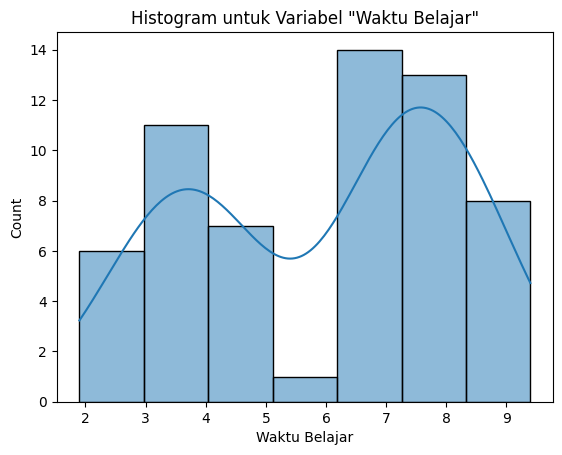

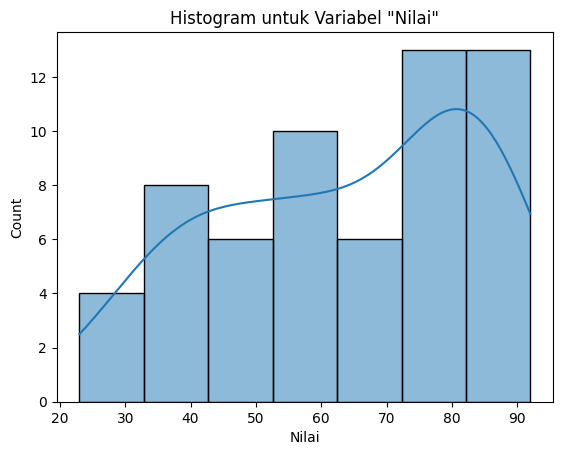

In [ ]:
# Visualisasi Histogram untuk setiap Variabel Numerik

for nama_kolom in daftar_nama_kolom_numerik:
  judul = 'Histogram untuk Variabel "' + nama_kolom + '"'

  plot = sns.histplot(data = data, x = nama_kolom, kde=True)
  plot_title = plt.title(judul)

  plt.show()
  print()

### [C4.C] Bar Chart

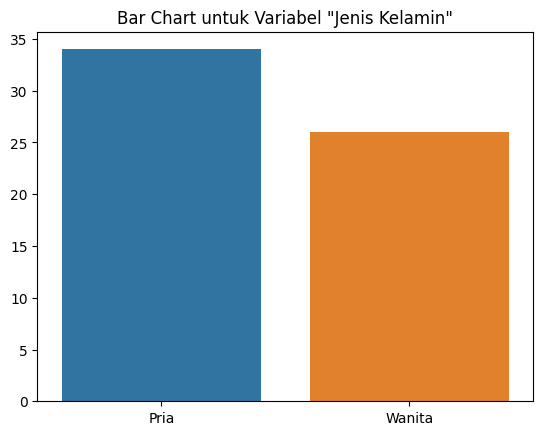

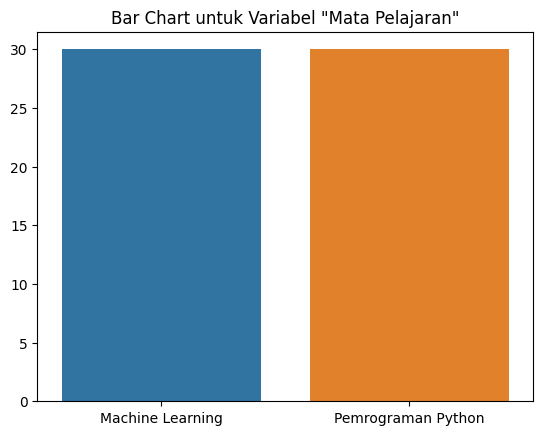

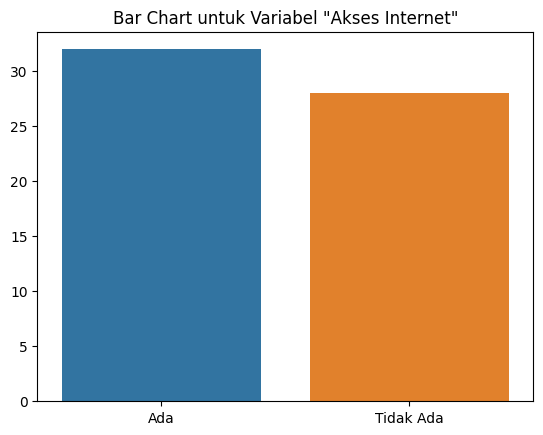

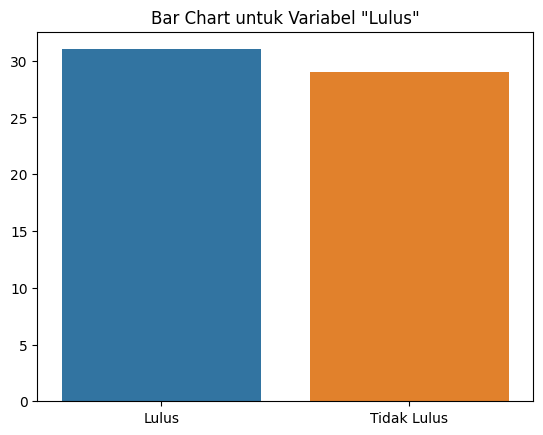

In [ ]:
# Visualisasi Distribusi Frequency dari Level untuk Variabel Kategorik pada Dataset
# menggunakan Bar Chart

palet_warna = sns.color_palette('bright')

for nama_kolom in daftar_nama_kolom_kategorik :
  judul = 'Bar Chart untuk Variabel "' + nama_kolom + '"'

  data_plot  = data[nama_kolom].value_counts().to_list()
  label_plot = data[nama_kolom].value_counts().index.to_list()

  plot       = sns.barplot(x = label_plot, y = data_plot)
  plot_title = plt.title(judul)

  plt.show()
  print()

## [C5] Bivariate Analysis

### [C.5.A] Overlay Histogram


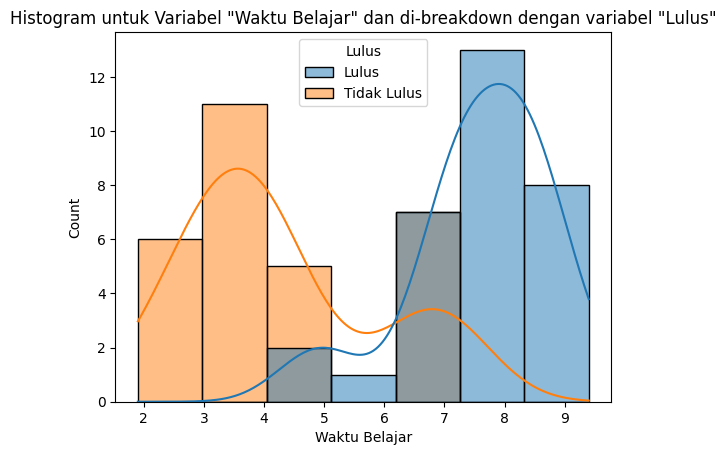

In [ ]:
# Visualisasi Overlay Histogram untuk setiap Variabel Numerik (Variabel Fitur)
# dengan Variabel Kategorik (Variabel Target)

daftar_nama_kolom = ['Waktu Belajar']

for nama_kolom in daftar_nama_kolom:
  judul = 'Histogram untuk Variabel "' + nama_kolom + '" dan di-breakdown dengan variabel "Lulus"'

  plot = sns.histplot(data = data, x = nama_kolom, hue = 'Lulus', kde=True)
  plot_title = plt.title(judul)

  plt.show()
  print()

### [C.5.B] Descriptive Statistics breakdown by Target Variable

In [ ]:
# Statistik Deskriptif untuk setiap Variabel Numerik (Variabel Fitur)
# dengan setiap Kelas pada Variabel Target (Variabel Kategorik)

data.groupby('Lulus')['Waktu Belajar'].describe()

,count,mean,std,min,25%,50%,75%,max
Lulus,,,,,,,,
Lulus,31.0,7.593548,1.156701,4.5,7.15,7.7,8.4,9.4
Tidak Lulus,29.0,4.293103,1.587435,1.9,3.20,3.8,4.7,7.2


### [C.5.B] Side by Side Bar Chart

<Axes: xlabel='Jenis Kelamin', ylabel='count'>

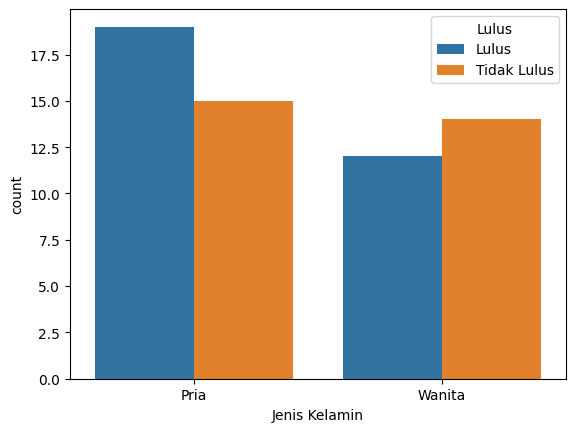

In [ ]:
sns.countplot(data=data, x="Jenis Kelamin", hue="Lulus")

<Axes: xlabel='Akses Internet', ylabel='count'>

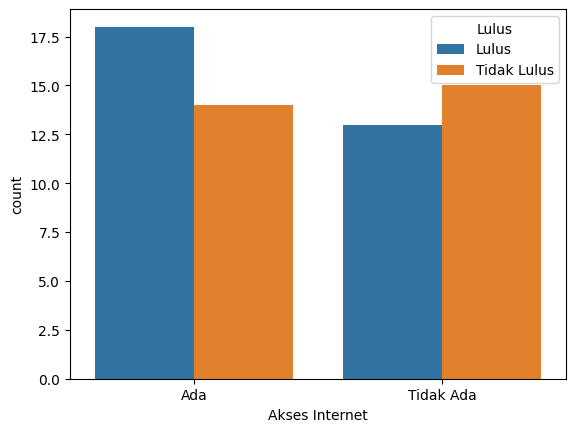

In [ ]:
sns.countplot(data=data, x="Akses Internet", hue="Lulus")

## [C6] Statistical Test

Skip Dulu !

# [D] Data Wrangling and Variable Transformation

## [D1] Label Encoding for Categorical Variables

In [ ]:
data_proc1 = data.copy()

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
data_proc1['Jenis Kelamin'] = [0 if x == 'Pria' else 1 for x in data_proc1['Jenis Kelamin']]

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,0,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,0,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,1,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,0,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,1,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
data_proc1['Akses Internet'] = [1 if x == 'Ada' else 0 for x in data_proc1['Akses Internet']]

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,0,Pemrograman Python,1,8.0,85,Lulus
1,DS23002,Budi,0,Pemrograman Python,1,7.5,80,Lulus
2,DS23003,Ayu,1,Pemrograman Python,1,8.5,90,Lulus
3,DS23004,Tono,0,Machine Learning,1,8.2,88,Lulus
4,DS23005,Putri,1,Machine Learning,1,7.7,83,Lulus


In [ ]:
data_proc1['Lulus'] = [1 if x == 'Lulus' else 0 for x in data_proc1['Lulus']]

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,0,Pemrograman Python,1,8.0,85,1
1,DS23002,Budi,0,Pemrograman Python,1,7.5,80,1
2,DS23003,Ayu,1,Pemrograman Python,1,8.5,90,1
3,DS23004,Tono,0,Machine Learning,1,8.2,88,1
4,DS23005,Putri,1,Machine Learning,1,7.7,83,1


## [D2] Defining Features Variables and Target Variables

In [ ]:
# Mendefinisikan Variabel Fitur/Independent/Predictor/X

daftar_variabel_fitur = ['Jenis Kelamin', 'Akses Internet','Waktu Belajar']

X = data_proc1[daftar_variabel_fitur]
X[0:5]

,Jenis Kelamin,Akses Internet,Waktu Belajar
0,0,1,8.0
1,0,1,7.5
2,1,1,8.5
3,0,1,8.2
4,1,1,7.7


In [ ]:
# Mendefinisikan Variabel Target/Dependent/Y

Y = data_proc1['Lulus']
Y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Lulus, dtype: int64

## [D3] Partitioning Dataset into Train and Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123)

In [ ]:
# Melihat Ukuran Data Variabel Fitur untuk Data Latih (Train)
X_train.shape

(48, 3)

In [ ]:
# Melihat Ukuran Data Variabel Target untuk Data Latih (Train)
Y_train.shape

(48,)

In [ ]:
# Melihat Ukuran Data Variabel Fitur untuk Data Uji (Test)
X_test.shape

(12, 3)

In [ ]:
# Melihat Ukuran Data Variabel Target untuk Data Uji (Test)
Y_test.shape

(12,)

# [E] Modelling

## [E1] Create Model

In [ ]:
# Membuat Model Pertama (Neural Network dengan Tensorflow)

model_1 = Sequential()
model_1.add(Dense(256, input_dim=3, activation='sigmoid'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])


In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               1024      
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Membuat Model Pertama (Neural Network dengan scikit-learn)

model_2 = MLPClassifier(hidden_layer_sizes=(256,),
                       activation='logistic',
                       solver='sgd',
                       learning_rate='constant',
                       learning_rate_init=0.001,
                       random_state=123)

## [E2] Train Model

In [ ]:
# Melatih Model Pertama
model_1.fit(X_train, Y_train,
            validation_data=(X_test,Y_test),
            epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 113ms/step - loss: 0.7889 - accuracy: 0.4583 - val_loss: 0.7041 - val_accuracy: 0.5833
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 0.7402 - accuracy: 0.4583 - val_loss: 0.7035 - val_accuracy: 0.5833
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.7229 - accuracy: 0.4375 - val_loss: 0.7068 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.7177 - accuracy: 0.2292 - val_loss: 0.7045 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 0.7106 - accuracy: 0.2083 - val_loss: 0.7105 - val_accuracy: 0.4167
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 0.7046 - accuracy: 0.5417 - val_loss: 0.7099 - val_accuracy: 0.4167
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 0.7021 - accuracy: 0.5417 - val_loss: 0.7142 - val_accuracy: 0.4167
Epoch 8/100
2/2 [==

In [ ]:
# Melatih Model Kedua
model_2.fit(X_train,Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(256,),
              random_state=123, solver='sgd')

# [F] Model Evaluation

## [F1] Prediction for Train Data

In [ ]:
# Prediksi untuk Model Pertama (Train Data)
pred_model_1_train = model_1.predict(X_train).reshape(-1).tolist()

df_pred_model_1_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_1_train['Lulus'] = Y_train
df_pred_model_1_train['Prediksi Lulus'] = pred_model_1_train
df_pred_model_1_train['Lulus'] = ['Tidak Lulus' if x == 0 else "Lulus" for x in df_pred_model_1_train['Lulus']]
df_pred_model_1_train['Prediksi Lulus'] = ['Tidak Lulus' if x < 0.5 else "Lulus" for x in df_pred_model_1_train['Prediksi Lulus']]
df_pred_model_1_train.head()

2/2 [==============================] - 0s 3ms/step


,Jenis Kelamin,Akses Internet,Waktu Belajar,Lulus,Prediksi Lulus
54,0,0,8.8,Lulus,Lulus
23,0,1,3.7,Tidak Lulus,Tidak Lulus
11,0,0,7.2,Tidak Lulus,Lulus
0,0,1,8.0,Lulus,Lulus
5,0,1,7.6,Lulus,Lulus


In [ ]:
# Prediksi untuk Model Kedua (Train Data)
pred_model_2_train = model_2.predict(X_train)

df_pred_model_2_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_2_train['Lulus'] = Y_train
df_pred_model_2_train['Prediksi Lulus'] = pred_model_2_train
df_pred_model_2_train['Lulus'] = ['Tidak Lulus' if x == 0 else "Lulus" for x in df_pred_model_2_train['Lulus']]
df_pred_model_2_train['Prediksi Lulus'] = ['Tidak Lulus' if x < 0.5 else "Lulus" for x in df_pred_model_2_train['Prediksi Lulus']]
df_pred_model_2_train.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Lulus,Prediksi Lulus
54,0,0,8.8,Lulus,Lulus
23,0,1,3.7,Tidak Lulus,Tidak Lulus
11,0,0,7.2,Tidak Lulus,Lulus
0,0,1,8.0,Lulus,Lulus
5,0,1,7.6,Lulus,Lulus


## [F2] Prediction for Test Data

In [ ]:
# Prediksi untuk Model Pertama (Test Data)
pred_model_1_test = model_1.predict(X_test).reshape(-1).tolist()

df_pred_model_1_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_1_test['Lulus'] = Y_test
df_pred_model_1_test['Prediksi Lulus'] = pred_model_1_test
df_pred_model_1_test['Lulus'] = ['Tidak Lulus' if x == 0 else "Lulus" for x in df_pred_model_1_test['Lulus']]
df_pred_model_1_test['Prediksi Lulus'] = ['Tidak Lulus' if x < 0.5 else "Lulus" for x in df_pred_model_1_test['Prediksi Lulus']]
df_pred_model_1_test.head()

1/1 [==============================] - 0s 26ms/step


,Jenis Kelamin,Akses Internet,Waktu Belajar,Lulus,Prediksi Lulus
24,0,1,2.8,Tidak Lulus,Tidak Lulus
39,0,0,9.2,Lulus,Lulus
15,1,0,8.6,Lulus,Lulus
31,1,1,3.7,Tidak Lulus,Tidak Lulus
43,0,1,3.8,Tidak Lulus,Tidak Lulus


In [ ]:
# Prediksi untuk Model Kedua (Test Data)
pred_model_2_test = model_2.predict(X_test)

df_pred_model_2_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_2_test['Lulus'] = Y_test
df_pred_model_2_test['Prediksi Lulus'] = pred_model_2_test
df_pred_model_2_test['Lulus'] = ['Tidak Lulus' if x == 0 else "Lulus" for x in df_pred_model_2_test['Lulus']]
df_pred_model_2_test['Prediksi Lulus'] = ['Tidak Lulus' if x < 0.5 else "Lulus" for x in df_pred_model_2_test['Prediksi Lulus']]
df_pred_model_2_test.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Lulus,Prediksi Lulus
24,0,1,2.8,Tidak Lulus,Tidak Lulus
39,0,0,9.2,Lulus,Lulus
15,1,0,8.6,Lulus,Lulus
31,1,1,3.7,Tidak Lulus,Tidak Lulus
43,0,1,3.8,Tidak Lulus,Tidak Lulus


## [F3] Evaluating Model with Classification Report

### [F3.A] Classification Report for Train Data

In [ ]:
# Classification Report untuk Model Pertama (Train Data)
pred_model_1_train_class = [0 if x < 0.5 else 1 for x in pred_model_1_train]

classification_report_model_1_train = classification_report(Y_train,pred_model_1_train_class)
print(classification_report_model_1_train)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.81      0.96      0.88        26

    accuracy                           0.85        48
   macro avg       0.87      0.84      0.85        48
weighted avg       0.87      0.85      0.85        48



In [ ]:
# Classification Report untuk Model Kedua (Train Data)
classification_report_model_2_train = classification_report(Y_train,pred_model_2_train)
print(classification_report_model_2_train)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        22
           1       0.79      1.00      0.88        26

    accuracy                           0.85        48
   macro avg       0.89      0.84      0.85        48
weighted avg       0.89      0.85      0.85        48



### [F3.B] Classification Report for Test Data

In [ ]:
# Classification Report untuk Model Pertama (Test Data)
pred_model_1_test_class = [0 if x < 0.5 else 1 for x in pred_model_1_test]

classification_report_model_1_test = classification_report(Y_test,pred_model_1_test_class)
print(classification_report_model_1_test)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



In [ ]:
# Classification Report untuk Model Kedua (Test Data)
classification_report_model_2_test = classification_report(Y_test,pred_model_2_test)
print(classification_report_model_2_test)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

